# **Importing all necessary libraries**

In [3]:
# importing required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from prophet import Prophet

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
!apt-get update
!apt-get install -y build-essential python3-dev python3-pip

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [2,591 kB]
Get:13 http://archive.ub

# **1. Data Cleaning:**


1.   Review the dataset provided.
2.   Identify and rectify any inconsistencies, missing values, or duplicates.
3.   Ensure data integrity and consistency.




### ***Review the dataset provided.***

In [1]:
# importing file from local drive

from google.colab import files
uploaded = files.upload()

Saving Coffee Shop Sales.xlsx to Coffee Shop Sales.xlsx


In [4]:
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

# Read the file into a DataFrame
df = pd.read_excel(fn)

User uploaded file "Coffee Shop Sales.xlsx" with length 10673280 bytes


In [5]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,3481,2023-01-07,09:44:57,1,8,Hell's Kitchen,1,18.0,Coffee beans,Organic Beans,Brazilian - Organic
1,3866,2023-01-08,07:30:17,1,5,Lower Manhattan,1,18.0,Coffee beans,Organic Beans,Brazilian - Organic
2,3971,2023-01-08,09:13:06,2,5,Lower Manhattan,1,18.0,Coffee beans,Organic Beans,Brazilian - Organic
3,4329,2023-01-08,17:48:46,1,3,Astoria,1,18.0,Coffee beans,Organic Beans,Brazilian - Organic
4,4573,2023-01-09,08:57:44,1,5,Lower Manhattan,1,18.0,Coffee beans,Organic Beans,Brazilian - Organic


In [ ]:
# ROWS and COLUMNS
df.shape

(149116, 11)


### ***Identify and rectify any inconsistencies, missing values, or duplicates.***

In [7]:
# checking datatypes and inconsistencies
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   transaction_id    149116 non-null  int64         
 1   transaction_date  149116 non-null  datetime64[ns]
 2   transaction_time  149116 non-null  object        
 3   transaction_qty   149116 non-null  int64         
 4   store_id          149116 non-null  int64         
 5   store_location    149116 non-null  object        
 6   product_id        149116 non-null  int64         
 7   unit_price        149116 non-null  float64       
 8   product_category  149116 non-null  object        
 9   product_type      149116 non-null  object        
 10  product_detail    149116 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 12.5+ MB


In [8]:
# missing values
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [9]:
# duplicate values
dup_rows = df[df.duplicated()]
dup_rows

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail


In [10]:
len(dup_rows)

0

### ***Ensure data integrity and consistency.***

In [11]:
# Ensure data integrity and consistency

# converting all string values to lowercase to remove inconsistency

df['store_location'] = df['store_location'].str.lower()
df['product_category'] = df['product_category'].str.lower()
df['product_type'] = df['product_type'].str.lower()
df['product_detail'] = df['product_detail'].str.lower()

In [12]:
#  removing all white spaces in the data frame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.sample(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
144744,70225,2023-04-18,17:00:41,1,3,astoria,82,12.00,branded,housewares,i need my bean! diner mug
54804,39754,2023-03-09,18:46:10,1,3,astoria,40,3.75,coffee,barista espresso,cappuccino
134414,115442,2023-06-02,11:39:11,1,5,lower manhattan,74,3.50,bakery,biscotti,ginger biscotti
21218,42834,2023-03-14,09:07:52,1,5,lower manhattan,28,2.00,coffee,gourmet brewed coffee,columbian medium roast sm
86827,88073,2023-05-08,09:26:29,1,8,hell's kitchen,51,3.00,tea,brewed black tea,earl grey lg


# **2. Profit/Loss Analysis:**
1.   Compare the products sales and give a graphical representation.
2.   Identify products/services generating profit and those incurring losses.




### ***Creating new features for Data analysis and predictive modeling***







In [13]:
# Transaction Month ,Day Added

df["transaction_month"] = df["transaction_date"].dt.month_name()
df["transaction_day"] = df["transaction_date"].dt.day_name()


In [14]:
# calculating Total Sales

df['total_sales'] = df['transaction_qty'] * df['unit_price']
df[['total_sales' ,'unit_price' , 'transaction_qty']].sample(5)



,total_sales,unit_price,transaction_qty
24958,5.0,2.50,2
81632,3.0,3.00,1
50926,7.5,3.75,2
16549,3.0,3.00,1
139905,3.0,3.00,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_time   149116 non-null  object        
 3   transaction_qty    149116 non-null  int64         
 4   store_id           149116 non-null  int64         
 5   store_location     149116 non-null  object        
 6   product_id         149116 non-null  int64         
 7   unit_price         149116 non-null  float64       
 8   product_category   149116 non-null  object        
 9   product_type       149116 non-null  object        
 10  product_detail     149116 non-null  object        
 11  transaction_month  149116 non-null  object        
 12  transaction_day    149116 non-null  object        
 13  total_sales        149116 non-null  float64 

### ***Compare the products sales and give a graphical representation.***











> **Calculating the total quantity sold for each product**.

In [ ]:
product_sales = df.groupby(['store_location' ,'product_type'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
product_sales

,store_location,product_type,total_sales
29,hell's kitchen,barista espresso,32420.20
58,lower manhattan,barista espresso,31051.00
0,astoria,barista espresso,27935.00
4,astoria,brewed chai tea,27427.90
17,astoria,hot chocolate,26335.25
...,...,...,...
44,hell's kitchen,green tea,407.00
14,astoria,green beans,400.00
15,astoria,green tea,388.50
22,astoria,organic chocolate,380.00


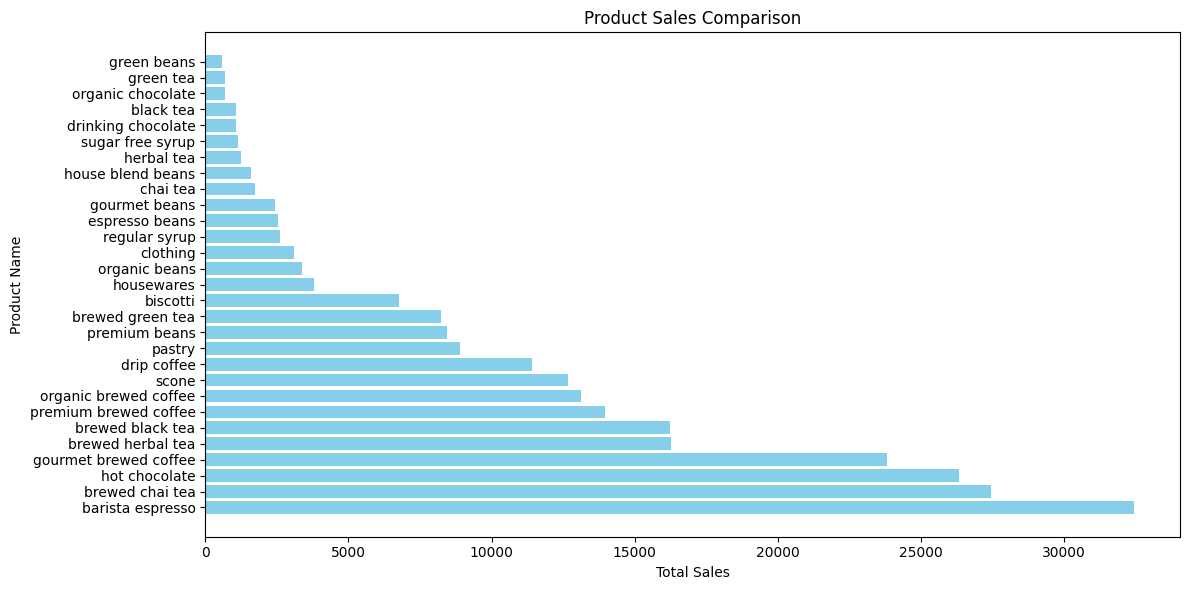

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(product_sales['product_type'], product_sales['total_sales'] ,color='skyblue')
plt.ylabel('Product Name')
plt.xlabel('Total Sales')
plt.title('Product Sales Comparison')
plt.tight_layout()
plt.show()

> **Product Sales Comparison at each location**









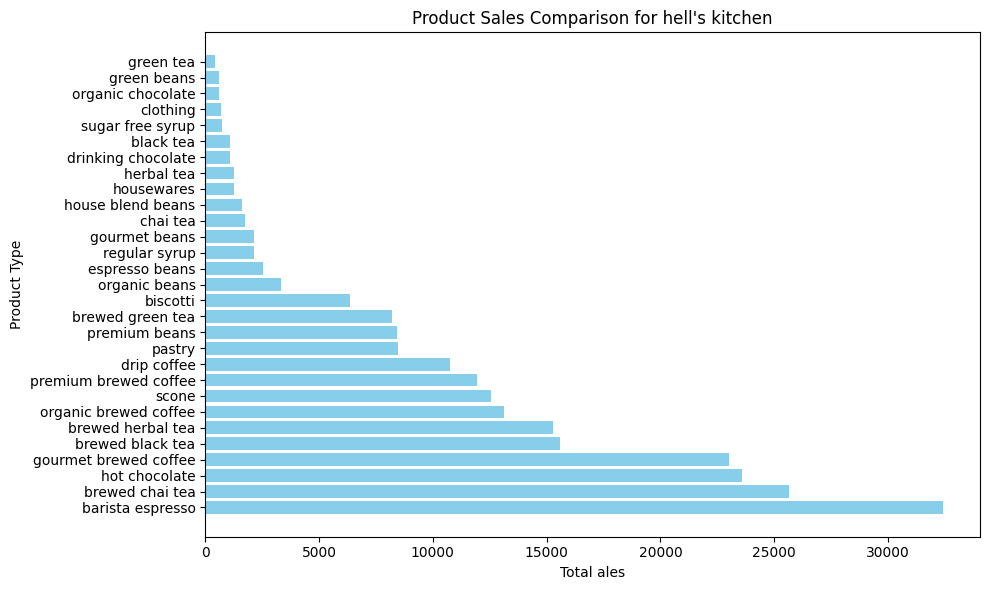

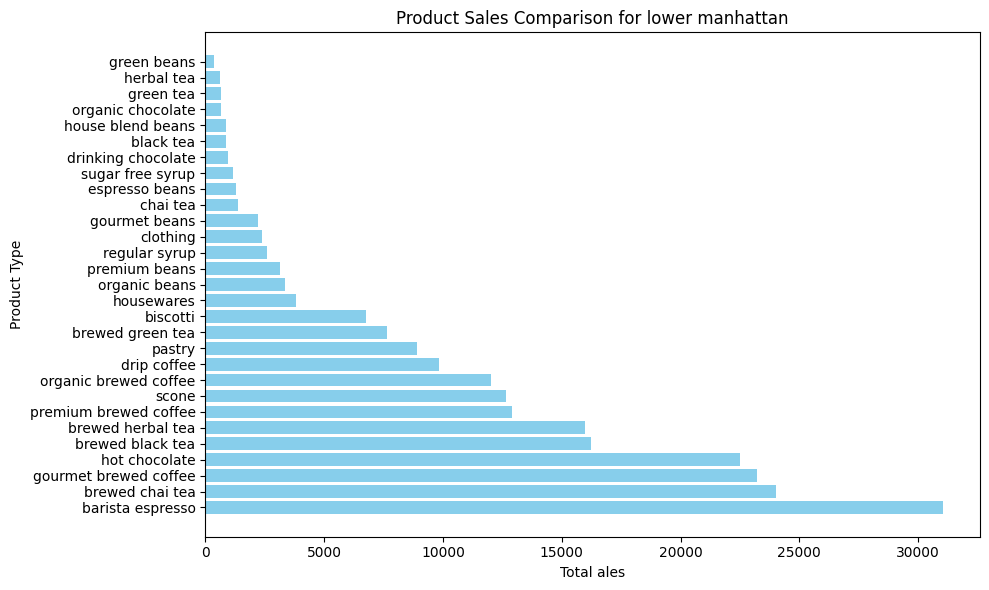

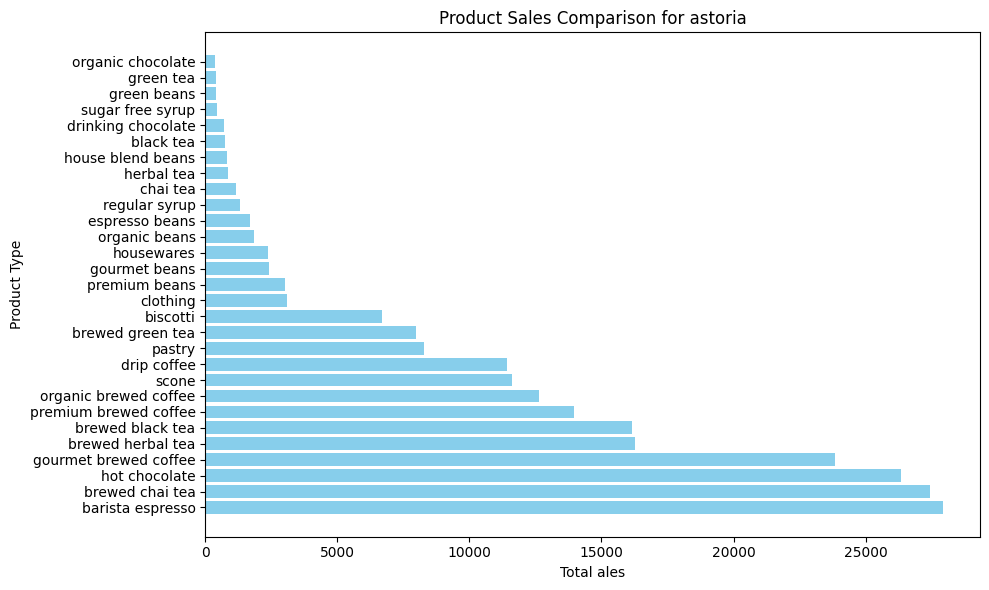

In [ ]:
for location in df['store_location'].unique():
    product_data = product_sales[product_sales['store_location'] == location].sort_values(by='total_sales', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.barh(product_data['product_type'], product_data['total_sales'], color='skyblue')
    plt.ylabel('Product Type')
    plt.xlabel('Total ales')
    plt.title(f'Product Sales Comparison for {location}')
    plt.tight_layout()
    plt.show()

### ***Identify products/services generating profit and those incurring losses.***

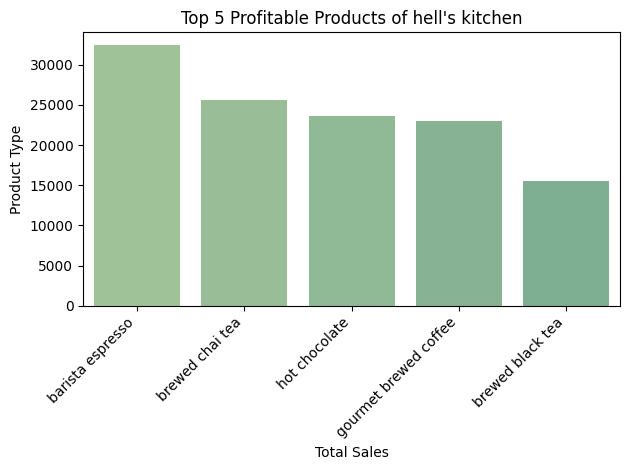

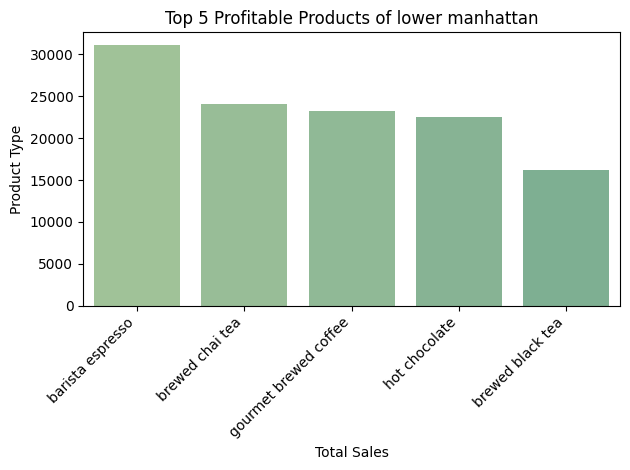

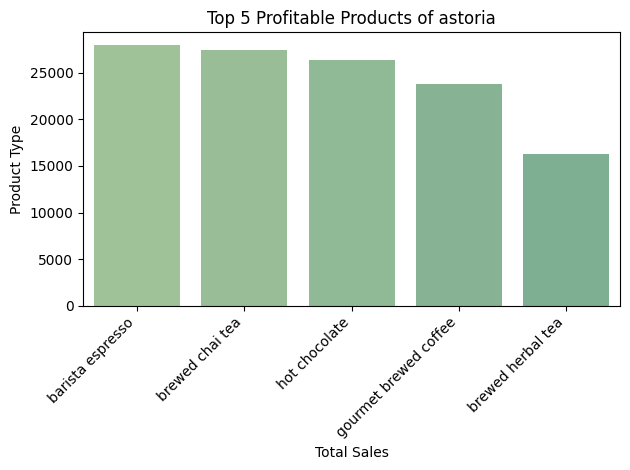

In [ ]:
warnings.filterwarnings('ignore')
for location in df['store_location'].unique():
    product_data = product_sales[product_sales['store_location'] == location].sort_values(by='total_sales', ascending=False)
    profitable_products = product_data.head(5)
    colors = sns.color_palette('crest', n_colors=len(product_data['product_type'].unique()))
    sns.barplot(x='product_type', y='total_sales', data=profitable_products, palette=colors)
    plt.ylabel('Product Type')
    plt.xlabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top 5 Profitable Products of {location}')
    plt.tight_layout()
    plt.show()



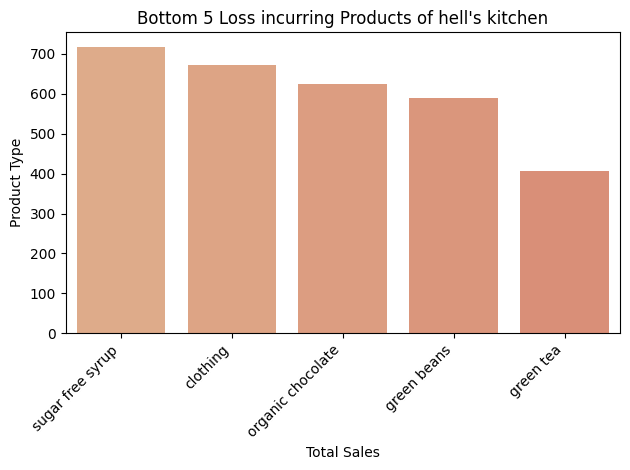

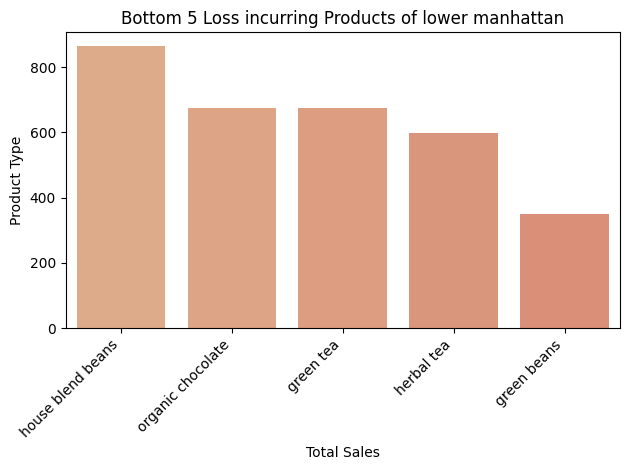

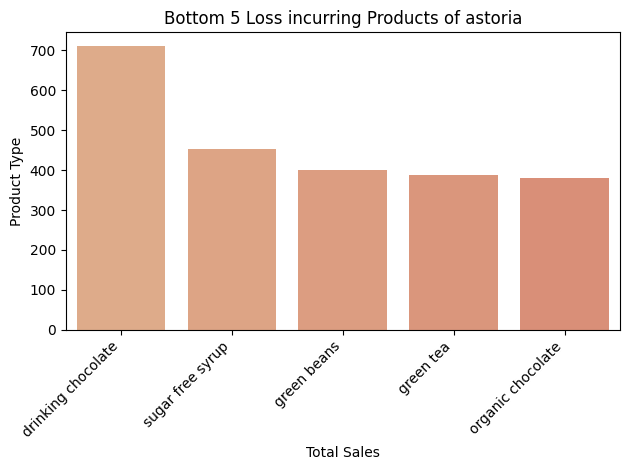

In [ ]:
warnings.filterwarnings('ignore')
for location in df['store_location'].unique():
    product_data = product_sales[product_sales['store_location'] == location].sort_values(by='total_sales', ascending=False)
    profitable_products = product_data.tail(5)
    colors = sns.color_palette('flare', n_colors=len(product_data['product_type'].unique()))
    sns.barplot(x='product_type', y='total_sales', data=profitable_products, palette=colors)
    plt.ylabel('Product Type')
    plt.xlabel('Total Sales')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Bottom 5 Loss incurring Products of {location}')
    plt.tight_layout()
    plt.show()

In [ ]:
df.shape

(149116, 14)


# **3. Profit Increase Prediction:**

1. Utilize predictive modeling techniques to forecast future profits.
2. Explore factors contributing to profitability.
3. Provide recommendations on strategies to increase profit margins.
4. identify that which product can increase profit.


# **4. Loss Mitigation:**

1. Analyze factors contributing to losses for each product/service.
2. Develop strategies to minimize or eliminate losses.
3. Propose actionable steps to convert loss-making products/services into profitable ones.










### ***Utilize predictive modeling techniques to forecast future profits.***

In [ ]:
sales = df.groupby('transaction_date')['total_sales'].sum().reset_index()
sales

,transaction_date,total_sales
0,2023-01-01,2508.20
1,2023-01-02,2403.35
2,2023-01-03,2565.00
3,2023-01-04,2220.10
4,2023-01-05,2418.85
...,...,...
176,2023-06-26,5875.90
177,2023-06-27,5975.65
178,2023-06-28,4728.90
179,2023-06-29,4450.75


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ivonm9g/ptb05ino.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp2ivonm9g/up_pjxva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26226', 'data', 'file=/tmp/tmp2ivonm9g/ptb05ino.json', 'init=/tmp/tmp2ivonm9g/up_pjxva.json', 'output', 'file=/tmp/tmp2ivonm9g/prophet_modelycgdpatk/prophet_model-20240707104445.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:44:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:44:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


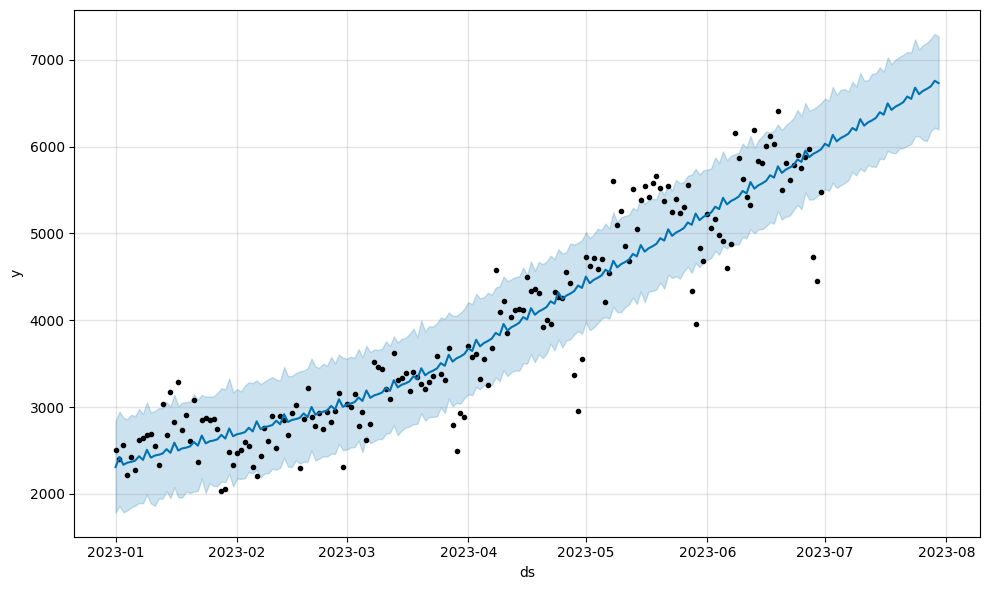

In [ ]:
prophet_df = sales.rename(columns={'transaction_date': 'ds', 'total_sales': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe
future = model.make_future_dataframe(periods=30)  # Forecasting for the next 30 days

# Predict future Sales
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


In [ ]:
 # Forecasting for the next 30 days
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
181,2023-07-01,6032.255993,5511.192938,6553.196043
182,2023-07-02,6004.593150,5488.264586,6525.443035
183,2023-07-03,6134.494168,5580.862806,6686.939651
184,2023-07-04,6059.224733,5522.336936,6597.829076
185,2023-07-05,6097.219762,5551.340686,6651.855673
186,2023-07-06,6120.297483,5579.603248,6661.837792
187,2023-07-07,6148.841760,5614.779087,6633.072206
188,2023-07-08,6213.558858,5710.002574,6746.467864
189,2023-07-09,6185.896015,5668.572854,6690.535374
190,2023-07-10,6315.797033,5746.887246,6846.111617


In [ ]:
# Get the actual and predicted values
y_true = prophet_df['y']
y_pred = forecast.loc[forecast['ds'].isin(prophet_df['ds']), 'yhat']

# Calculate RMSE, MSE and MAE
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)

print(f"(RMSE) Root Mean Squared Error: {rmse}")
print(f"(MSE) Mean Squared Error: {mse}")
print(f"(MAE) Mean Absolute Error: {mae}")

(RMSE) Root Mean Squared Error: 414.0651540385421
(MSE) Mean Squared Error: 171449.9517889616
(MAE) Mean Absolute Error: 306.408636534479


### ***Explore factors contributing to profitability.***



> Peak Days of sales at each location




In [ ]:
daily_sales = df.groupby(['transaction_day', 'store_location'])['total_sales'].sum().reset_index()
daily_sales

,transaction_day,store_location,total_sales
0,Friday,astoria,33472.75
1,Friday,hell's kitchen,34743.18
2,Friday,lower manhattan,33157.07
3,Monday,astoria,33928.29
4,Monday,hell's kitchen,33389.51
5,Monday,lower manhattan,34359.48
6,Saturday,astoria,31845.93
7,Saturday,hell's kitchen,32599.23
8,Saturday,lower manhattan,32449.32
9,Sunday,astoria,32795.18


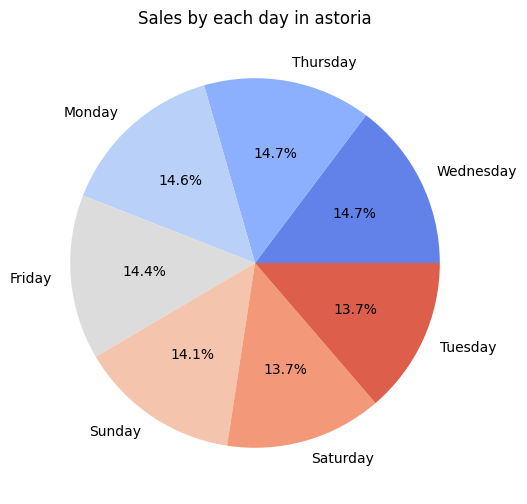

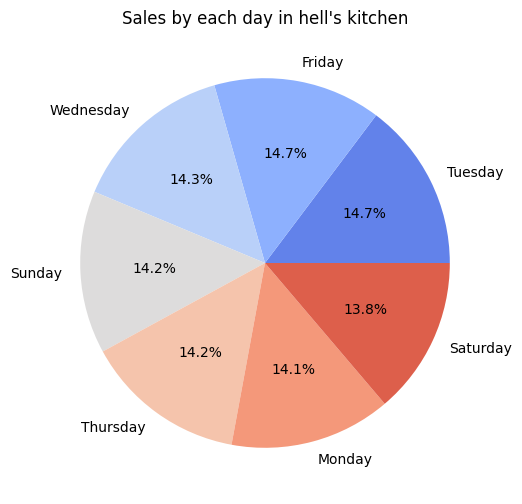

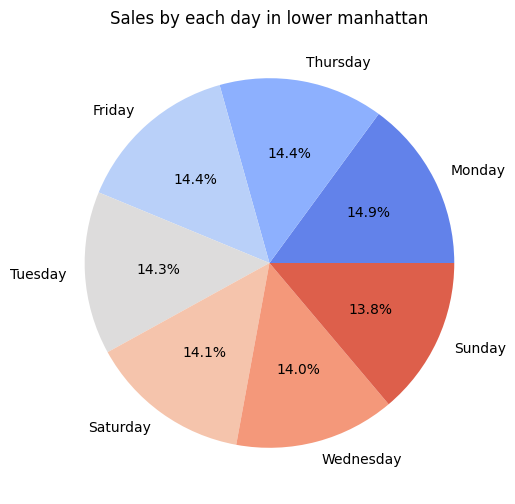

In [ ]:
for store in daily_sales['store_location'].unique():
    # Filter data for the current store location
    store_data = daily_sales[daily_sales['store_location'] == store]

    # Sort by total_sales in descending order
    store_data = store_data.sort_values(by='total_sales', ascending=False)

    # Define the color palette based on unique transaction days
    colors = sns.color_palette('coolwarm', n_colors=len(store_data['transaction_day'].unique()))

    # Plotting the pie chart
    plt.figure(figsize=(10, 6))
    plt.title(f'Sales by each day in {store}')
    plt.pie(store_data['total_sales'], labels=store_data['transaction_day'], autopct='%1.1f%%', colors=colors)
    plt.show()



> Peak hours of Sales


In [ ]:
df['transaction_hour'] = df['transaction_time'].dt.hour

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df['time_str'] = df['transaction_time'].astype(str)
print("\nDataFrame with time column as string:")
df


DataFrame with time column as string:


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_month,transaction_day,total_sales,time_str
0,3481,2023-01-07,09:44:57,1,8,hell's kitchen,1,18.0,coffee beans,organic beans,brazilian - organic,January,Saturday,18.0,09:44:57
1,3866,2023-01-08,07:30:17,1,5,lower manhattan,1,18.0,coffee beans,organic beans,brazilian - organic,January,Sunday,18.0,07:30:17
2,3971,2023-01-08,09:13:06,2,5,lower manhattan,1,18.0,coffee beans,organic beans,brazilian - organic,January,Sunday,36.0,09:13:06
3,4329,2023-01-08,17:48:46,1,3,astoria,1,18.0,coffee beans,organic beans,brazilian - organic,January,Sunday,18.0,17:48:46
4,4573,2023-01-09,08:57:44,1,5,lower manhattan,1,18.0,coffee beans,organic beans,brazilian - organic,January,Monday,18.0,08:57:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149111,149037,2023-06-30,11:17:50,1,8,hell's kitchen,87,3.0,coffee,barista espresso,ouro brasileiro shot,June,Friday,3.0,11:17:50
149112,149040,2023-06-30,11:18:31,1,8,hell's kitchen,87,2.1,coffee,barista espresso,ouro brasileiro shot,June,Friday,2.1,11:18:31
149113,149297,2023-06-30,16:33:19,1,5,lower manhattan,87,3.0,coffee,barista espresso,ouro brasileiro shot,June,Friday,3.0,16:33:19
149114,149319,2023-06-30,17:20:32,2,8,hell's kitchen,87,3.0,coffee,barista espresso,ouro brasileiro shot,June,Friday,6.0,17:20:32


In [ ]:
# Extract the hour using string slicing
df['transaction_hour'] = df['time_str'].str[0:2]

# Convert the hour to integer
df['transaction_hour'] = df['transaction_hour'].astype(int)
print("\nDataFrame with extracted hour:")
df['transaction_hour']



DataFrame with extracted hour:


0          9
1          7
2          9
3         17
4          8
          ..
149111    11
149112    11
149113    16
149114    17
149115    18
Name: transaction_hour, Length: 149116, dtype: int64

In [ ]:
df = df.drop(columns=['time_str'])
print("\nFinal DataFrame after cleanup:")
df.sample(5)


Final DataFrame after cleanup:


,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_month,transaction_day,total_sales,transaction_hour
148604,115446,2023-06-02,11:42:16,1,8,hell's kitchen,87,3.0,coffee,barista espresso,ouro brasileiro shot,June,Friday,3.0,11
141625,90308,2023-05-10,08:31:58,1,5,lower manhattan,78,4.5,bakery,scone,scottish cream scone,May,Wednesday,4.5,8
95839,110402,2023-05-28,10:58:56,1,8,hell's kitchen,54,2.5,tea,brewed chai tea,morning sunrise chai rg,May,Sunday,2.5,10
3178,68369,2023-04-16,13:35:14,1,3,astoria,20,7.6,packaged chocolate,organic chocolate,sustainably grown organic,April,Sunday,7.6,13
23861,35474,2023-03-03,15:24:23,1,3,astoria,29,2.5,coffee,gourmet brewed coffee,columbian medium roast rg,March,Friday,2.5,15


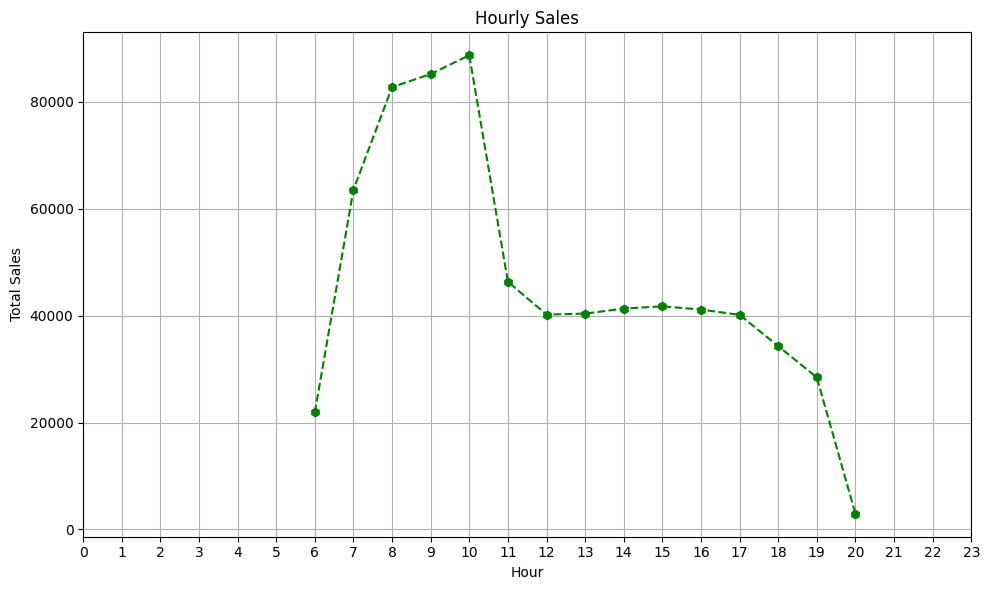

In [ ]:
hourly_sales = df.groupby('transaction_hour')['total_sales'].sum()

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot on the subplot without lines, only markers
hourly_sales.plot(ax=ax, marker='h', color='green', linestyle='dashed')  # Set linestyle to empty string

ax.grid()
ax.set_title('Hourly Sales')
ax.set_xlabel('Hour')
ax.set_ylabel('Total Sales')
ax.set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

In [ ]:
hourly_store_sales = df.groupby(['store_location','transaction_hour'])['total_sales'].sum().reset_index()
hourly_store_sales

,store_location,transaction_hour,total_sales
0,astoria,7,19028.80
1,astoria,8,22805.90
2,astoria,9,23183.57
3,astoria,10,24426.12
4,astoria,11,15498.13
5,astoria,12,15681.20
6,astoria,13,15947.87
7,astoria,14,15175.27
8,astoria,15,15651.95
9,astoria,16,16110.85


<Figure size 1000x700 with 0 Axes>

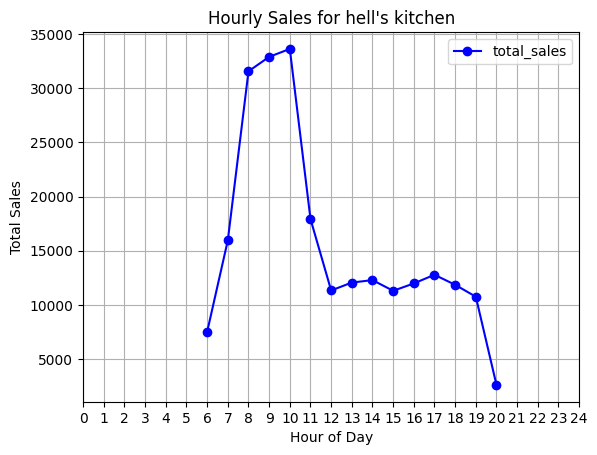

<Figure size 1000x700 with 0 Axes>

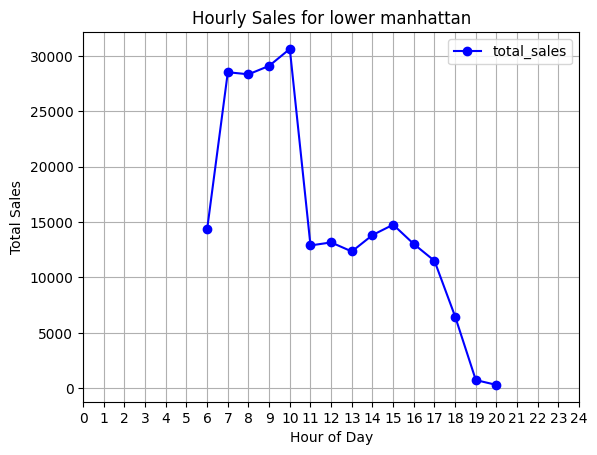

<Figure size 1000x700 with 0 Axes>

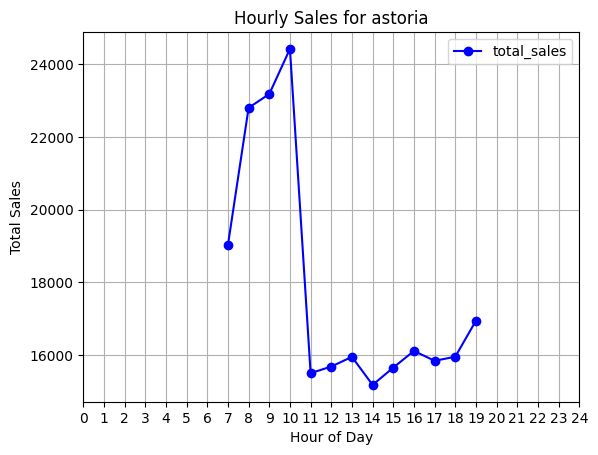

In [ ]:
unique_stores = df['store_location'].unique()

for store in unique_stores:
    # Now this line should work correctly
    store_data = hourly_store_sales[hourly_store_sales['store_location'] == store]

    plt.figure(figsize=(10, 7))
    # Use .plot() for line plot instead of sns.barplot()
    store_data.plot(x='transaction_hour', y='total_sales', marker='o', linestyle='-', color='blue')

    plt.title(f'Hourly Sales for {store}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Total Sales')
    plt.xticks(range(0, 25))
    plt.grid(True)
    plt.show()

### ***Provide recommendations on strategies to increase profit margins.***



> Calculate Profit and Profit Margin



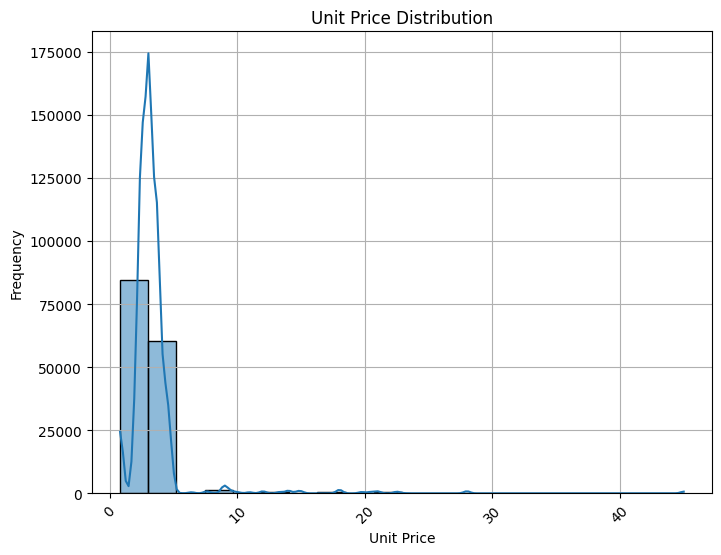

In [ ]:

# Distribution of unit prices
plt.figure(figsize=(8, 6))
sns.histplot(df['unit_price'], bins=20, kde=True)
plt.title('Unit Price Distribution')
plt.grid()
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The above code provides the unit price distribution, on the basis of the unit price distribution, let's assume the cost price of each unit is 2

In [ ]:
total_sales = df['total_sales']
cost_price = 2
df['profit'] = total_sales - cost_price
df['profit_margin'] = (df['profit'] / total_sales) * 100

In [ ]:
df.sample(5)

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,transaction_month,transaction_day,total_sales,transaction_hour,profit,profit_margin
75791,107058,2023-05-25,08:46:27,1,8,hell's kitchen,47,3.00,tea,brewed green tea,serenity green tea lg,May,Thursday,3.00,8,1.00,33.333333
54027,146633,2023-06-28,11:24:07,1,3,astoria,39,4.25,coffee,barista espresso,latte rg,June,Wednesday,4.25,11,2.25,52.941176
10859,88782,2023-05-08,18:06:58,1,3,astoria,24,3.00,coffee,drip coffee,our old time diner blend lg,May,Monday,3.00,18,1.00,33.333333
83990,88770,2023-05-08,17:55:16,1,8,hell's kitchen,50,2.50,tea,brewed black tea,earl grey rg,May,Monday,2.50,17,0.50,20.000000
95543,95535,2023-05-15,06:53:47,2,8,hell's kitchen,54,2.50,tea,brewed chai tea,morning sunrise chai rg,May,Monday,5.00,6,3.00,60.000000




> **Focus on High-Profit-Margin Products**



In [ ]:
product_profit_margin = df.groupby('product_type')['profit_margin'].mean().sort_values(ascending=False)
print("Product Profitability Margin:")
product_profit_margin

Product Profitability Margin:


product_type
premium beans            93.202272
clothing                 92.822012
organic beans            90.001563
gourmet beans            88.935727
house blend beans        88.888889
espresso beans           88.217812
housewares               85.137449
green beans              80.000000
chai tea                 79.268291
green tea                78.378378
drinking chocolate       77.789266
black tea                77.653631
herbal tea               77.653631
organic chocolate        73.684211
hot chocolate            63.466629
barista espresso         57.446999
premium brewed coffee    50.886274
brewed chai tea          47.875295
organic brewed coffee    46.811416
pastry                   45.868700
brewed herbal tea        45.643199
brewed black tea         45.550661
brewed green tea         45.303787
scone                    43.038177
gourmet brewed coffee    42.953772
biscotti                 41.806846
drip coffee              38.249774
sugar free syrup        -77.756304
regular

In [ ]:
# Identify high-profit products
high_profit_products = product_profit_margin[product_profit_margin > 80]  # Adjust threshold as needed

print("High-Profit Products:")
high_profit_products

High-Profit Products:


product_type
premium beans        93.202272
clothing             92.822012
organic beans        90.001563
gourmet beans        88.935727
house blend beans    88.888889
espresso beans       88.217812
housewares           85.137449
Name: profit_margin, dtype: float64



> **Cost Reduction stretagy**



In [ ]:
low_profit_products = product_profit_margin[product_profit_margin < 50]  # Adjust threshold as needed

print("Low-Profit Products:")
print(low_profit_products)

Low-Profit Products:
product_type
brewed chai tea          47.875295
organic brewed coffee    46.811416
pastry                   45.868700
brewed herbal tea        45.643199
brewed black tea         45.550661
brewed green tea         45.303787
scone                    43.038177
gourmet brewed coffee    42.953772
biscotti                 41.806846
drip coffee              38.249774
sugar free syrup        -77.756304
regular syrup           -85.349300
Name: profit_margin, dtype: float64


In [ ]:
df['total_cost'] = cost_price * df['transaction_qty']
df['cost_price'] = cost_price

# Display cost analysis for low-profit products
cost_analysis = df[df['product_type'].isin(low_profit_products.index)].groupby('product_type').agg({
    'unit_price': 'mean',
    'cost_price': 'mean',
    'total_cost': 'sum',
    'profit': 'sum'
})
cost_analysis


,unit_price,cost_price,total_cost,profit
product_type,,,,
biscotti,3.419503,2.0,11576,8371.53
brewed black tea,2.744670,2.0,34924,25232.00
brewed chai tea,2.936993,2.0,52500,42715.95
brewed green tea,2.742462,2.0,17394,12510.50
brewed herbal tea,2.744731,2.0,34656,25049.50
drip coffee,2.484959,2.0,25782,15030.00
gourmet brewed coffee,2.696641,2.0,51946,36210.60
organic brewed coffee,2.898021,2.0,26024,20768.50
pastry,3.685979,2.0,13922,11831.99




> **Pricing stretagy to over Come loss**



In [ ]:
# Increase prices for low-margin products by a certain percentage
price_increase_percentage = 0.10  # 10%
df.loc[df['product_type'].isin(low_profit_products.index), 'unit_price'] *= (1 + price_increase_percentage)

# Display updated prices for low-profit products, grouped by product type
updated_low_profit_products = df[df['product_type'].isin(low_profit_products.index)].groupby('product_type').agg({
    'unit_price': 'mean'})
updated_low_profit_products


,unit_price
product_type,
biscotti,15.712523
brewed black tea,12.611683
brewed chai tea,13.495403
brewed green tea,12.601537
brewed herbal tea,12.611965
drip coffee,11.418321
gourmet brewed coffee,12.390995
organic brewed coffee,13.316328
pastry,16.936976


### ***identify that which product can increase profit.***

In [ ]:
product_profitability = df.groupby('product_type')['profit'].mean().sort_values(ascending=False)
print("Product Profitability:")
product_profitability

Product Profitability:


product_type
premium beans            41.403274
clothing                 25.886878
organic beans            18.504819
gourmet beans            16.573770
house blend beans        16.000000
espresso beans           15.430251
housewares               12.152091
drinking chocolate        8.255789
green beans               8.000000
chai tea                  7.709368
green tea                 7.250000
herbal tea                6.950000
black tea                 6.950000
organic chocolate         5.600000
hot chocolate             4.314615
barista espresso          3.572529
premium brewed coffee     2.767197
brewed chai tea           2.485943
organic brewed coffee     2.446519
brewed herbal tea         2.227612
brewed black tea          2.223084
brewed green tea          2.206048
gourmet brewed coffee     2.141119
drip coffee               1.773033
pastry                    1.711804
scone                     1.623918
biscotti                  1.465861
sugar free syrup         -0.716731
regular

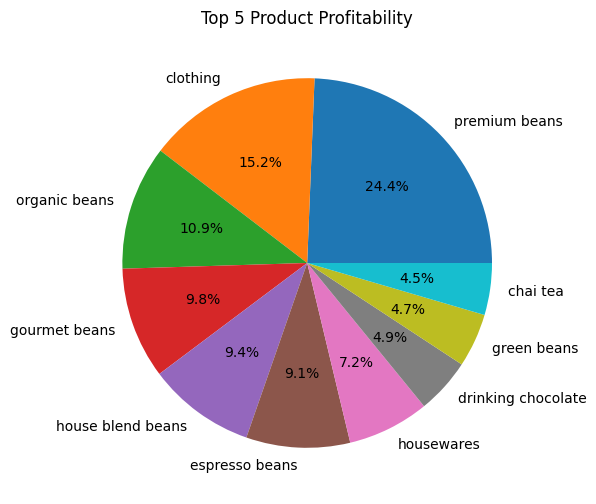

In [ ]:
product_profitability = product_profitability.head(10)

# Plot the top 5 product types
plt.figure(figsize=(10, 6))
plt.pie(product_profitability.values, labels=product_profitability.index, autopct='%1.1f%%')
plt.title('Top 5 Product Profitability')
plt.show()


### ***Extras***

In [ ]:
# calculating monthly revenue
monthly_revenue = df.groupby('transaction_month')['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False)
monthly_revenue

,transaction_month,revenue
3,June,166485.88
5,May,156727.76
0,April,118941.08
4,March,98834.68
2,January,81677.74
1,February,76145.19


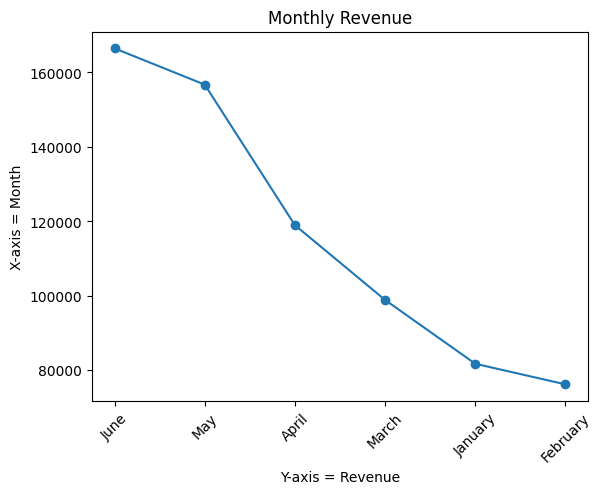

In [ ]:
# Sample data
y = monthly_revenue['revenue']
x = monthly_revenue['transaction_month']


plt.plot(x, y ,marker='o')
plt.xticks(rotation=45)

# Add title and labels
plt.title('Monthly Revenue')
plt.xlabel('Y-axis = Revenue')
plt.ylabel('X-axis = Month')

# Display the graph
plt.show()


In [ ]:
monthly_revenue_store = df.groupby(['transaction_month', 'store_location'])['revenue'].sum().reset_index().sort_values(by='revenue',ascending=False)
monthly_revenue_store

,transaction_month,store_location,revenue
10,June,Hell's Kitchen,56957.08
9,June,Astoria,55083.11
11,June,Lower Manhattan,54445.69
16,May,Hell's Kitchen,52598.93
15,May,Astoria,52428.76
17,May,Lower Manhattan,51700.07
1,April,Hell's Kitchen,40304.14
0,April,Astoria,39477.61
2,April,Lower Manhattan,39159.33
13,March,Hell's Kitchen,33110.57


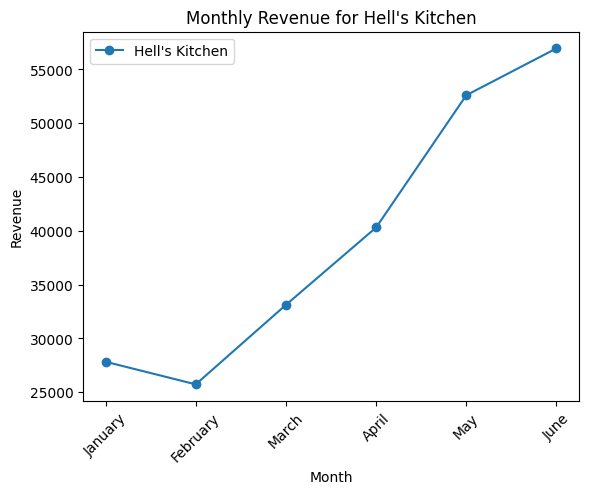

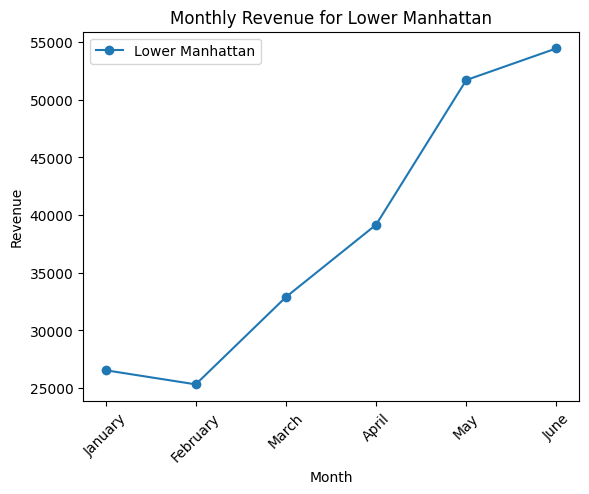

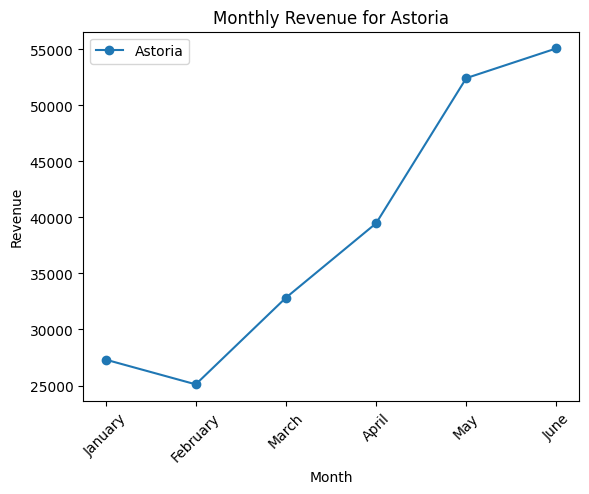

In [ ]:
# Custom sorting function
import warnings
warnings.filterwarnings("ignore")

def sort_months(month):
    month_order = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    if month in month_order:
        return month_order.index(month)
    else:
        return -1

for store in df['store_location'].unique():
    store_data = monthly_revenue_store[monthly_revenue_store['store_location'] == store]
    # Apply the sorting function to each month individually
    store_data['transaction_month_order'] = store_data['transaction_month'].apply(sort_months)
    store_data = store_data.sort_values(by='transaction_month_order') # Sort by the new order column
    plt.plot(store_data['transaction_month'], store_data['revenue'], marker='o', label=store)
    plt.xticks(rotation=45)
    plt.title(f'Monthly Revenue for {store}')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.legend()
    plt.show()

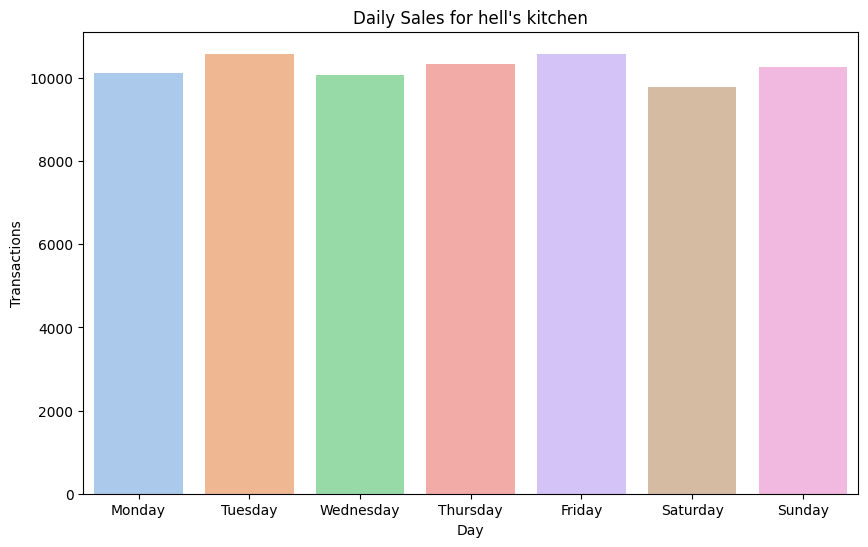

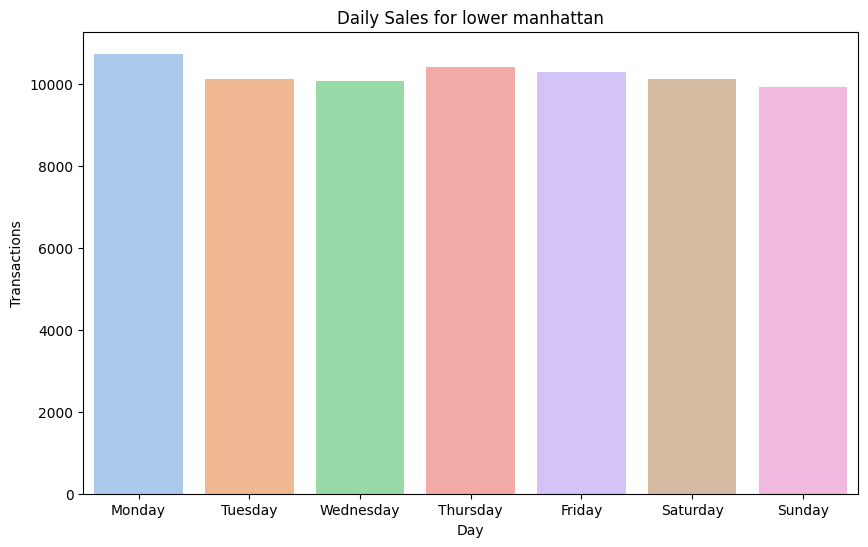

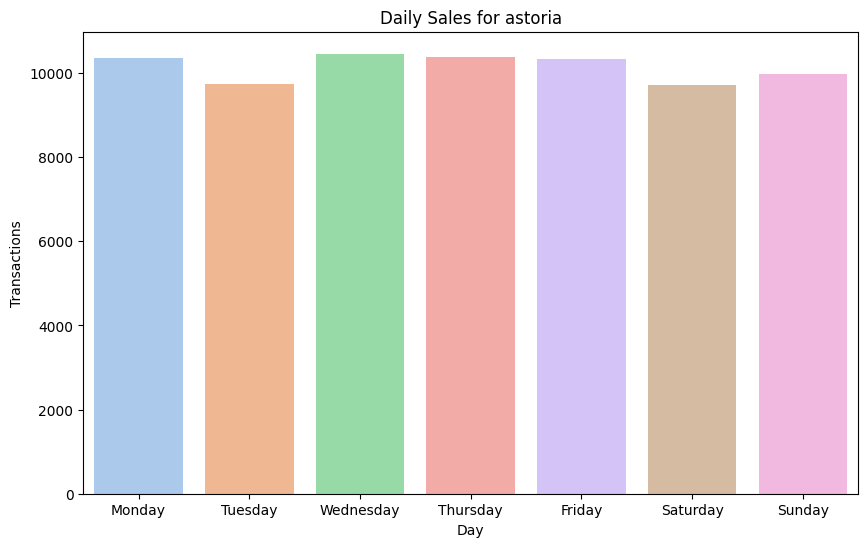

In [ ]:
# Custom sorting function
warnings.filterwarnings("ignore")

def sort_day(day):
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
                   'Sunday']
    if day in day_order:
        return day_order.index(day)
    else:
        return -1


for store in df['store_location'].unique():
    store_data = daily_sales[daily_sales['store_location'] == store]
    # Apply the sorting function to each day individually
    store_data['transaction_day_order'] = store_data['transaction_day'].apply(sort_day)
    store_data = store_data.sort_values(by='transaction_day_order')  # Sort by the new order column

    # Define the color palette
    colors = sns.color_palette('pastel', n_colors=len(store_data['transaction_day'].unique()))
    plt.figure(figsize=(10, 6))
    # Plot using sns.barplot and apply the color palette
    sns.barplot(x='transaction_day', y='transaction_qty', data=store_data, palette=colors)

    # Set the title and labels
    plt.title(f'Daily Sales for {store}')
    plt.xlabel('Day')
    plt.ylabel('Transactions')

    # Show the plot
    plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   transaction_id     149116 non-null  int64         
 1   transaction_date   149116 non-null  datetime64[ns]
 2   transaction_time   149116 non-null  object        
 3   transaction_qty    149116 non-null  int64         
 4   store_id           149116 non-null  int64         
 5   store_location     149116 non-null  object        
 6   product_id         149116 non-null  int64         
 7   unit_price         149116 non-null  float64       
 8   product_category   149116 non-null  object        
 9   product_type       149116 non-null  object        
 10  product_detail     149116 non-null  object        
 11  transaction_month  149116 non-null  object        
 12  transaction_day    149116 non-null  object        
 13  total_sales        149116 non-null  float64 

In [16]:
store_sales = df.groupby(['store_location'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
store_sales

,store_location,total_sales
1,hell's kitchen,236511.17
0,astoria,232243.91
2,lower manhattan,230057.25
